In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('netflix_titles.csv')

In [65]:
print("Primeras 5 filas del DataFrame:")
df.head()

Primeras 5 filas del DataFrame:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [66]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


## Análisis de Valores Ausentes

Esto nos permitirá identificar y cuantificar los valores ausentes en cada columna para comprender la completitud de los datos.

In [67]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# Imputación de datos a registros faltantes

In [68]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Others')

# Eliminar registros con datos faltantes en 'date_added', 'rating' y 'duration'
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)


In [69]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [70]:
df.shape

(8790, 12)

# Análisis de tipos de contenido.
Este paso nos permitirá ver la distribución de películas y programas de televisión en el conjunto de datos.

In [71]:
print("Distribución de Tipos de Contenido (Películas vs. Series de TV):")
df['type'].value_counts()

Distribución de Tipos de Contenido (Películas vs. Series de TV):


,count
type,
Movie,6126
TV Show,2664


# Análisis de Años de Lanzamiento.
Este paso nos ayudará a identificar tendencias en la producción de contenido a lo largo del tiempo.

In [72]:
print("Distribución de Contenido por Año de Lanzamiento:")
df['release_year'].value_counts()

Distribución de Contenido por Año de Lanzamiento:


,count
release_year,
2018,1146
2017,1030
2019,1030
2020,953
2016,901
...,...
1961,1
1925,1
1959,1


# Análisis de Distribución de Clasificaciones'
Esto nos permitirá entender cómo se distribuyen las clasificaciones de contenido en el dataset.

In [78]:
print("Distribución de Clasificación:")
df['rating'].value_counts()

Distribución de Clasificación:


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


# Identificar los 10 años con más contenido

Contar el número de películas/series por año de lanzamiento y seleccionar los 10 años con la mayor cantidad.


In [79]:
top_10_release_years = df['release_year'].value_counts().head(10)
print("Los 10 años con más contenido:\n", top_10_release_years)

Los 10 años con más contenido:
 release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64


**Reasoning**:
Now that the top 10 release years have been identified, the next step is to filter the original DataFrame to include only the content from these specific years. This will create a new DataFrame containing only the data relevant to the subtask's next part.



In [80]:
df_filtered_by_years = df[df['release_year'].isin(top_10_release_years.index)]
print("DataFrame filtrado por los 10 años con más contenido. Primeras 5 filas:")
df_filtered_by_years.head()

DataFrame filtrado por los 10 años con más contenido. Primeras 5 filas:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Others,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Others,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Reasoning**:
Now that the DataFrame is filtered to include only the top 10 release years, the next step is to analyze the distribution of content ratings within this subset. I will count the frequency of each 'rating' in the `df_filtered_by_years` DataFrame.



In [81]:
print("Distribución de Clasificaciones de Contenido en los 10 años con más contenido:")
df_filtered_by_years['rating'].value_counts()

Distribución de Clasificaciones de Contenido en los 10 años con más contenido:


,count
rating,
TV-MA,2959
TV-14,1704
TV-PG,697
R,505
TV-Y,285
TV-Y7,280
PG-13,228
TV-G,197
PG,145


# Análisis de categorías
Se obtiene el listado de las categorías mas populares a partir de la variable 'listed_in'.
1. ¿Cuál es el genero mas popular (series y películas)?

In [82]:
genre_exploded = df.copy()
genre_exploded["genre"] = genre_exploded["listed_in"].str.split(", ")
genre_exploded = genre_exploded.explode("genre")
top_genres = genre_exploded["genre"].value_counts().head(10)
top_genres

,count
genre,
International Movies,2752
Dramas,2426
Comedies,1674
International TV Shows,1349
Documentaries,869
Action & Adventure,859
TV Dramas,762
Independent Movies,756
Children & Family Movies,641


# Análisis del genero 'International Movies'
Se analiza el comportamiento de las películas y series del género 'International Movies' a través de los distintos años de adición a Netflix

In [83]:
international_movies_df = genre_exploded[genre_exploded['genre'] == 'International Movies'].copy()
international_movies_df['date_added'] = pd.to_datetime(international_movies_df['date_added'], errors='coerce')
international_movies_df['release_year_from_date_added'] = international_movies_df['date_added'].dt.year
print("Distribución de 'International Movies' por año de lanzamiento (extraído de 'date_added'):")
international_movies_df['release_year_from_date_added'].value_counts()

Distribución de 'International Movies' por año de lanzamiento (extraído de 'date_added'):


,count
release_year_from_date_added,
2018,668
2019,610
2020,575
2021,408
2017,395
2016,82
2015,10
2014,2
2011,1


In [84]:
print("Distribución de Contenido por País:")
df['country'].value_counts().head(10)

Distribución de Contenido por País:


,count
country,
United States,2809
India,972
Others,829
United Kingdom,418
Japan,243
South Korea,199
Canada,181
Spain,145
France,124


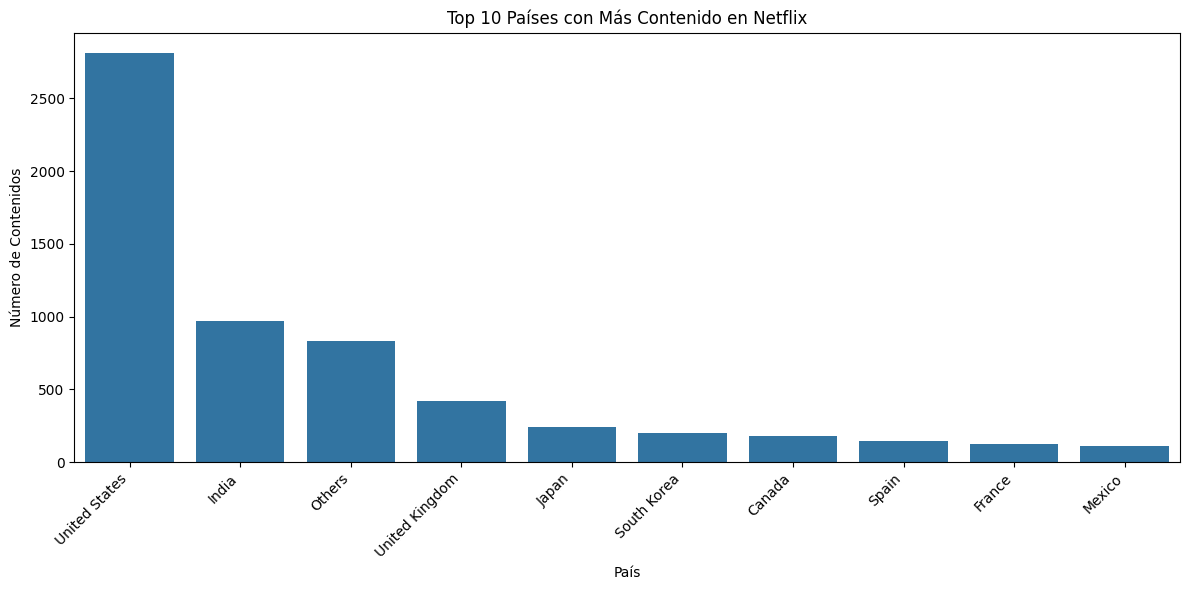

In [85]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x=df['country'].value_counts().head(10).index, y=df['country'].value_counts().head(10).values)
plt.title('Top 10 Países con Más Contenido en Netflix')
plt.xlabel('País')
plt.ylabel('Número de Contenidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
# Definir una lista de clasificaciones válidas (basado en el análisis previo y la comprensión del dominio)
valid_ratings = ['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G', 'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR']

# Filtrar el DataFrame para incluir solo clasificaciones válidas
df_cleaned_ratings = df[df['rating'].isin(valid_ratings)]

print("Distribución de Clasificaciones de Contenido (limpiada):")
rating_counts = df_cleaned_ratings['rating'].value_counts()
print(rating_counts)


Distribución de Clasificaciones de Contenido (limpiada):
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


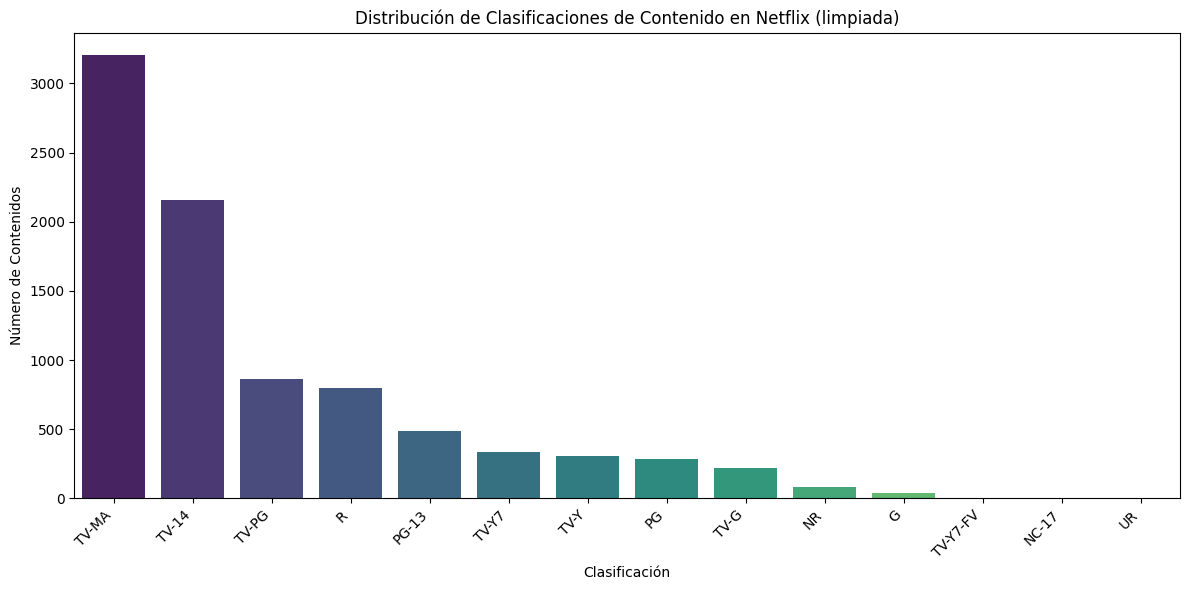

In [88]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribución de Clasificaciones de Contenido en Netflix (limpiada)')
plt.xlabel('Clasificación')
plt.ylabel('Número de Contenidos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

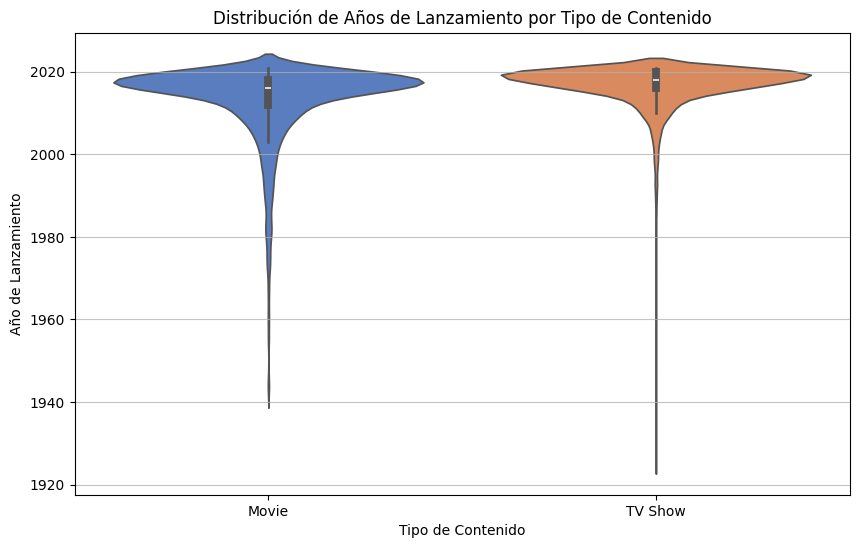

In [89]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='release_year', data=df, palette='muted')
plt.title('Distribución de Años de Lanzamiento por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Año de Lanzamiento')
plt.grid(axis='y', alpha=0.75)
plt.show()

# ¿Hay una relación entre cuanto tiempo pasa entre cuando se lanza (release_year) la película o serie y cuando se añade (date_added, extraer el año) a la plataforma?

In [90]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['years_to_add'] = df['date_added'].dt.year - df['release_year']
print("Primeras 5 filas con la nueva columna 'years_to_add':")
df[['title', 'date_added', 'release_year', 'years_to_add']].head()

Primeras 5 filas con la nueva columna 'years_to_add':


,title,date_added,release_year,years_to_add
0,Dick Johnson Is Dead,2021-09-25,2020,1.0
1,Blood & Water,2021-09-24,2021,0.0
2,Ganglands,2021-09-24,2021,0.0
3,Jailbirds New Orleans,2021-09-24,2021,0.0
4,Kota Factory,2021-09-24,2021,0.0


## Visualizar la relación entre los años

### Subtask:
Crear un gráfico para visualizar la distribución de esta diferencia de años, lo que nos permitirá observar tendencias en cuánto tiempo tarda el contenido en llegar a la plataforma después de su lanzamiento.


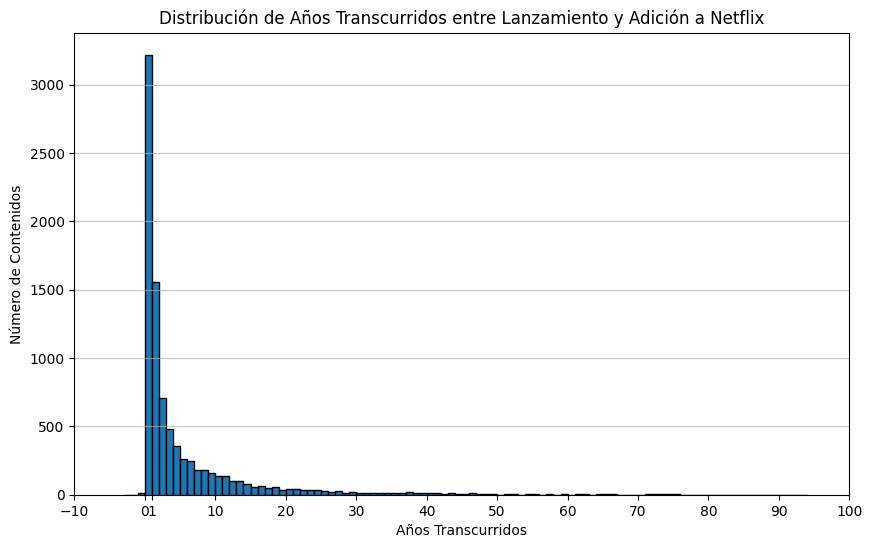

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(df['years_to_add'].dropna(), bins=range(int(df['years_to_add'].min()), int(df['years_to_add'].max()) + 2), edgecolor='black')
plt.title('Distribución de Años Transcurridos entre Lanzamiento y Adición a Netflix')
plt.xlabel('Años Transcurridos')
plt.ylabel('Número de Contenidos')

# Obtener los valores mínimo y máximo de years_to_add
min_val_data = df['years_to_add'].min()
max_val_data = df['years_to_add'].max()

# Determinar los límites de los ticks en múltiplos de 10 que abarquen el rango de datos
lower_bound_for_ticks = (int(min_val_data) // 10) * 10
upper_bound_for_ticks = ((int(max_val_data) + 10 - 1) // 10) * 10

# Generar ticks en intervalos de 10
ticks = list(range(lower_bound_for_ticks, upper_bound_for_ticks + 1, 10))

# Asegurar que el valor 1 esté incluido en los ticks si no lo está ya
if 1 not in ticks:
    ticks.append(1)

# Ordenar los ticks para una visualización correcta
ticks = sorted(list(set(ticks)))

plt.xticks(ticks)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [93]:
average_years_by_type = df.groupby('type')['years_to_add'].mean()
print("Media de años entre el lanzamiento y la adición a Netflix por tipo de contenido:")
print(average_years_by_type)

Media de años entre el lanzamiento y la adición a Netflix por tipo de contenido:
type
Movie      5.730983
TV Show    2.224379
Name: years_to_add, dtype: float64
